# Ontario Public Sector Salary EDA Analysis 🏭
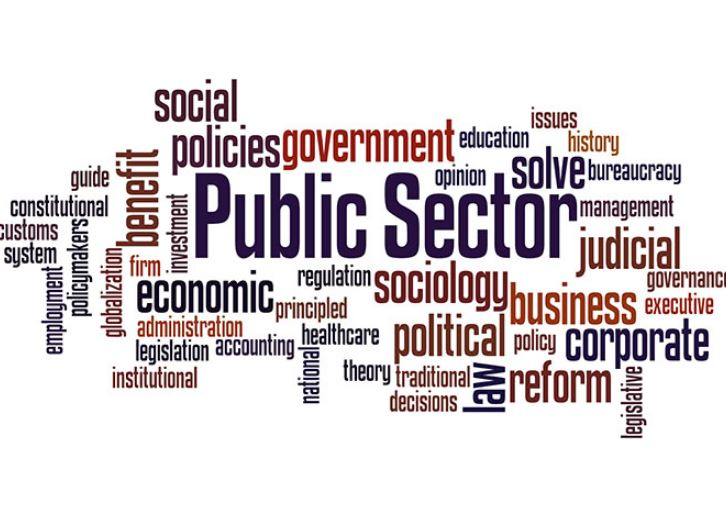

# 1. Introduction ⬇
**This notebook is our attempt to visualize Salaries of Public Sectors in Ontario.**

# 2. Importing required libraries 📚

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt  

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 3. Reading CSV Data 📝

In [ ]:
df = pd.read_csv("../input/ontario/ontario-public-sector-salary-2018.csv")
df.head()

In [ ]:
df1 = pd.read_csv("../input/ontario/ontario-public-sector-salary-2019.csv")
df1.head()

In [ ]:
df.info()

In [ ]:
df1.info()

In [ ]:
df.shape

In [ ]:
df1.shape

# 4. Data Visualization 📉

**4.1. Analysing average salary of each sector in 2018**

In [ ]:
x = list(df['Sector'].unique())
x

In [ ]:
df['Salary Paid'] = df['Salary Paid'].apply(lambda s : float(re.sub("[^\d\.]", "", s)))

df['Salary Paid'] = pd.to_numeric(df['Salary Paid'],downcast='integer')
y = list(df['Salary Paid'].groupby(df['Sector']).mean())
y

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(x, y, color ='green',  
        width = 0.4) 
  
plt.xlabel("sector") 
plt.ylabel("avg salary") 
plt.xticks(rotation=90)
plt.title("avg salary of each sector in 2018") 
plt.show() 

**4.2. Analysing average salary of each sector in 2019**

In [ ]:
x1 = list(df1['Sector'].unique())
x1

In [ ]:
df1['Salary Paid'] = df1['Salary Paid'].apply(lambda s : float(re.sub("[^\d\.]", "", s)))

df1['Salary Paid'] = pd.to_numeric(df1['Salary Paid'],downcast='integer')
y1 = list(df1['Salary Paid'].groupby(df1['Sector']).mean())
y1

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(x, y, color ='blue',  
        width = 0.5) 
  
plt.xlabel("sector") 
plt.ylabel("avg salary") 
plt.xticks(rotation=90)
plt.title("avg salary of each sector in 2019") 
plt.show() 

**4.3. Analysing average salaries of each sectors in both 2018 and 2019**

In [ ]:
fig = plt.figure(figsize = (20, 5)) 
br1 = np.arange(len(x)) 
br2 = [x + 0.4 for x in br1] 
plt.bar(br1, y, color ='g', width = 0.4, edgecolor ='grey', label ='2018') 
plt.bar(br2, y1, color ='b', width = 0.4,edgecolor ='grey', label ='2019') 
plt.xlabel('Sector', fontweight ='bold') 
plt.ylabel('Avg Salary', fontweight ='bold') 
plt.xticks([r + 0.4 for r in range (len(x))],x) 
plt.xticks(rotation=90)
   
plt.show() 

**4.4. Contribution of each sector in total entries**

In [ ]:
jobs = list(df['Job Title'].unique())
print(len(jobs))
emp = list(df['Employer'].unique())
print(len(emp))

In [ ]:
sector_df = list(((df['Sector'].value_counts()).reindex()))
sector_df
sector_count=[]
sector=x[0:13]
for i in range(len(sector_df)):
    if sector_df[i]>10:
        sector_count.append(sector_df[i])
print(len(sector_count))
print(len(sector))

In [ ]:
# the contribution of each sector
labels = sector
sizes = sector_count
my_circle=plt.Circle( (0,0), 0.7, color='white')


from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(sizes, labels=labels, colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
Sectors = df["Sector"].unique()
sec_df = (df['Sector'].value_counts()).reindex()
x = Sectors
y = sec_df
porcent = 100*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

**4.5. Taxable benefits vs Sectors**

In [ ]:
df['Taxable Benefits'] = df['Taxable Benefits'].apply(lambda s : float(re.sub("[^\d\.]", "", s)))

df['Taxable Benefits'] = pd.to_numeric(df['Taxable Benefits'],downcast='integer')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.font_manager as fm

fontsize2use = 15
tax_job = list(df['Taxable Benefits'].groupby(df['Sector']).mean())

fig = plt.figure(figsize=(15,5))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)
ax = fig.add_subplot(111)
fig.clf()
ax.set_xlim(-1,100)

x = Sectors
y = tax_job

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("sectors")
plt.ylabel("taxable benifits")
plt.title("Taxable benifits vs sectors")

plt.xticks(x_pos, x,rotation=90)

plt.show()